# Part 1: Import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Part 2: Load the dataset

In [2]:
df = pd.read_csv('movies_modeling.csv')
df.head()

,month_released,rated,genre,runtime_minutes,belongs_to_collection,production_budget_usd,domestic_gross_usd,worldwide_gross_usd,imdb_score,dir_acted,...,dir_special_effects,dir_stunts,dir_visual_effects,dir_writer,non_dom_gross_usd,title_length,worldwide_roi,domestic_roi,non_dom_roi,success_level_ww
0,5,R,Drama,146.0,0,19000000,44568631,45613093,8.4,0,...,0,0,0,1,1044462,11,1.400689,1.345717,-0.945028,2
1,6,R,Adventure,104.0,1,4500000,47923795,47923795,5.8,1,...,0,0,0,1,0,15,9.649732,9.649732,-1.000000,2
2,7,PG,Comedy,88.0,1,3500000,83453539,83453539,7.7,0,...,0,0,0,0,0,9,22.843868,22.843868,-1.000000,2
3,7,R,Comedy,98.0,1,6000000,39846344,39849764,7.3,1,...,0,0,0,1,3420,10,5.641627,5.641057,-0.999430,2
4,5,R,Horror,95.0,1,550000,39754601,59754601,6.4,0,...,0,0,0,1,20000000,15,107.644729,71.281093,35.363636,2


From the rated column replace **G**, **Not Rated**, **Unrated**, **NC-17**, and **TV-MA** into another category called **Other**

In [3]:
to_replace = ["G", "Not Rated","Unrated", "NC-17", "TV-MA"]
df[["rated"]] = df[["rated"]].replace(to_replace,"Other")

From the genre column replace **Fantasy**, **Mistery**, **Thriller**, **Family**, **Sci-Fi**, and **Romance** into another category called **Other**

In [4]:
to_replace_genre = ["Fantasy", "Mystery","Family", "Sci-Fi", "Thriller", "Romance"]
df[["genre"]] = df[["genre"]].replace(to_replace_genre,"Other")

Drop helping columns

In [5]:
# Drop revenue-related and roi-related columns
to_drop_columns = ["imdb_score","domestic_gross_usd", "non_dom_gross_usd", "worldwide_roi", "domestic_roi", 
                   "non_dom_roi", "success_level_ww"]
new_df = df.drop(to_drop_columns, axis = 1)

# Part 3: Split the data

In [6]:
X = new_df.drop('worldwide_gross_usd', axis=1)
y = new_df['worldwide_gross_usd']

# Split 70/30 with a random state of 37 to ensure reproductibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)

In [7]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

# Part 4: One Hot Encoding 

In [8]:
# OneHotEncode the rating train data

# Start the OneHotEncoder
ohe = OneHotEncoder(sparse=False)

# Make a copy of the dataset to avoid any data leakage and maintain integrity.
movie_rating = X_train[['rated']].copy() 

# Fit the Encoder to the data frame
ohe.fit(movie_rating)  

# Convert the results to a data frame and make the column names have the rating they are representing.
movie_rating_ohe = pd.DataFrame(
     data=ohe.transform(movie_rating),
     columns=[f"rating_{rating}" for rating in ohe.categories_[0]])

C:\Users\mcastellanosmonte\Downloads\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
# OneHotEncode the genre train data

# Initializing the Encoder
ohe = OneHotEncoder(sparse=False)

# Make a copy of the dataset to avoid any data leakage and maintain integrity.
movie_genre = X_train[['genre']].copy() 

# Fit the encoder to the dataframe
ohe.fit(movie_genre)  

# Convert the results to a data frame and make the column names have the genres they are representing.
movie_genre_ohe = pd.DataFrame(
     data=ohe.transform(movie_genre),
     columns=[f"genre_{genre}" for genre in ohe.categories_[0]])

C:\Users\mcastellanosmonte\Downloads\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
X_train_ohe = pd.concat([X_train, movie_rating_ohe, movie_genre_ohe], axis=1)
X_train_ohe.drop(['rated', 'genre'], axis=1, inplace=True)

In [11]:
# OneHotEncode the rating test data

# Start the OneHotEncoder
ohe = OneHotEncoder(sparse=False)

# Make a copy of the dataset to avoid any data leakage and maintain integrity.
movie_rating = X_test[['rated']].copy() 

# Fit the Encoder to the data frame
ohe.fit(movie_rating)  

# Convert the results to a data frame and make the column names have the rating they are representing.
movie_rating_ohe = pd.DataFrame(
     data=ohe.transform(movie_rating),
     columns=[f"rating_{rating}" for rating in ohe.categories_[0]])

C:\Users\mcastellanosmonte\Downloads\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
# OneHotEncode the genre test data

# Initializing the Encoder
ohe = OneHotEncoder(sparse=False)

# Make a copy of the dataset to avoid any data leakage and maintain integrity.
movie_genre = X_test[['genre']].copy() 

# Fit the encoder to the dataframe
ohe.fit(movie_genre)  

# Convert the results to a data frame and make the column names have the genres they are representing.
movie_genre_ohe = pd.DataFrame(
     data=ohe.transform(movie_genre),
     columns=[f"genre_{genre}" for genre in ohe.categories_[0]])

C:\Users\mcastellanosmonte\Downloads\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
X_test_ohe = pd.concat([X_test, movie_rating_ohe, movie_genre_ohe], axis=1)
X_test_ohe.drop(['rated', 'genre'], axis=1, inplace=True)

# Part 5: Scale the features

In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_ohe)
X_test_scaled = scaler.transform(X_test_ohe)

In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_ohe.columns, index=X_train_ohe.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_ohe.columns, index=X_test_ohe.index)

# Part 6: Build and fit the model

In [16]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [17]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [18]:
preds = rf.predict(X_test_scaled)

In [19]:
errors = abs(preds - y_test)

In [20]:
print('MAE: ', np.mean(errors))

MAE:  72478077.2681441


In [21]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 117669624.510087


In [22]:
print('R2: ', r2_score(y_test, preds))

R2:  0.5918611369634179


In [33]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(best_params)

C:\Users\mcastellanosmonte\Downloads\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mcastellanosmonte\Downloads\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mcastellanosmonte\Downloads\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\mcastellanosmonte\Downloads\Anaconda3\envs\learn-env\l

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [34]:
# Building another Random Forest with the best parameters
rf2 = RandomForestRegressor(n_estimators=50, max_depth=None, max_features='sqrt', min_samples_leaf=1,
                            min_samples_split=5, random_state=42)
rf2.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_
preds2 = best_rf.predict(X_test_scaled)

rmse2 = np.sqrt(mean_squared_error(y_test, preds2))
print("RMSE: %f" % (rmse2))

print('R2: ', r2_score(y_test, preds2))

RMSE: 112514212.509732
R2:  0.6268409447289107


In [35]:
range_target = y_test.max() - y_test.min()
print(range_target)

1395309583


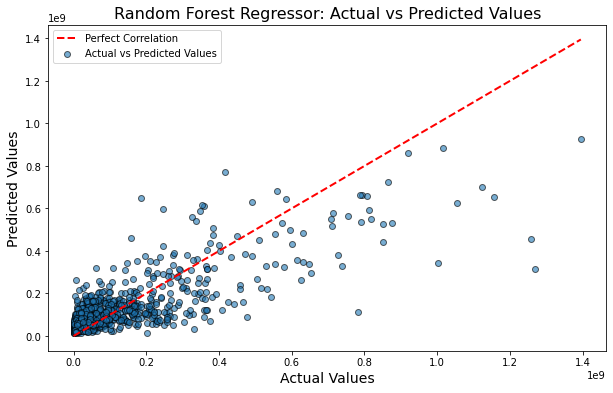

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, preds2, alpha=0.6, edgecolor='k', label='Actual vs Predicted Values')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Random Forest Regressor: Actual vs Predicted Values', fontsize=16)

plt.plot([min(y_test.min(), preds2.min()), max(y_test.max(), preds2.max())],
         [min(y_test.min(), preds2.min()), max(y_test.max(), preds2.max())],
         color='red', linestyle='--', linewidth=2, label='Perfect Correlation')
plt.legend()
plt.show()

### Scatter plot
The points are clustered at the bottom left, indicating a large number of low values.

There is a clear deviation from the perfect correlation line, particularly for larger values where predictions do not match well with the actual values

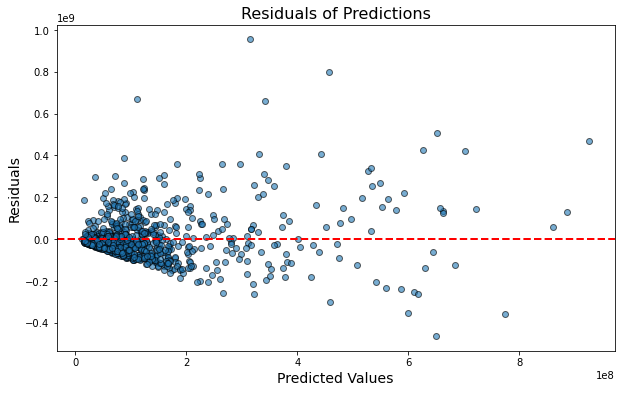

In [37]:
residuals = y_test - preds2

plt.figure(figsize=(10, 6))
plt.scatter(preds2, residuals, alpha=0.6, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)

plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals of Predictions', fontsize=16)

plt.show()

### Residuals
The residuals are not uniformly scattered around zero, particularly for higher predicted values.

There is a concentration of residuals around zero for lower predicted values, but as predicted values increase, the residuals spread out more, indicating increasing error.

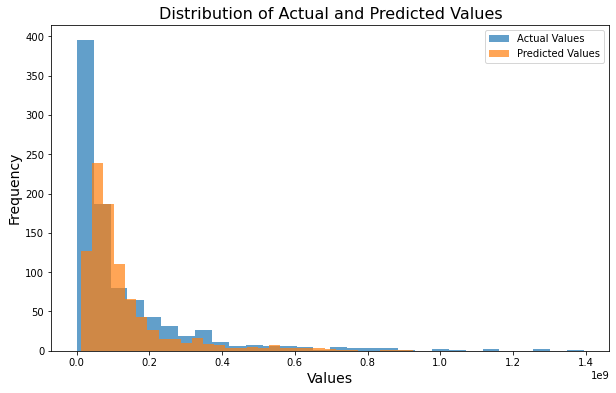

In [38]:
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.7, label='Actual Values')
plt.hist(preds2, bins=30, alpha=0.7, label ='Predicted Values')
plt.xlabel('Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Actual and Predicted Values', fontsize=16)
plt.legend()
plt.show()

### Histogram
There is a heavy concentration of values near zero.

The predicted values (orange) tend to undersetimate compared to the actual values (blue)

In [39]:
mae = mean_absolute_error(y_test, preds2)
mse = mean_squared_error(y_test, preds2)
r2 = r2_score(y_test, preds2)

print(f"MAE: {mae}") # on average the model's prediction are off by about 70.79 million
print(f"MSE: {mse}") # large errors in the predictions
print(f"R2: {r2}") # about 62.7 % of the variance in the target variable is explained by the model

MAE: 70795154.83051312
MSE: 1.2659448016685136e+16
R2: 0.6268409447289107
